In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [4]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [5]:
x_train = train_datagen.flow_from_directory(r"D:\Assigment3\Flowers-Dataset\flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [6]:
x_test = test_datagen.flow_from_directory(r"D:\Assigment3\Flowers-Dataset\flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [7]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten


In [9]:
model=Sequential()


In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))


In [12]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [15]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 49s 275ms/step - loss: 0.7109 - accuracy: 0.7345 - val_loss: 0.7025 - val_accuracy: 0.7264
Epoch 2/10
180/180 [==============================] - 52s 291ms/step - loss: 0.6826 - accuracy: 0.7410 - val_loss: 0.6433 - val_accuracy: 0.7547
Epoch 3/10
180/180 [==============================] - 50s 276ms/step - loss: 0.6584 - accuracy: 0.7433 - val_loss: 0.5707 - val_accuracy: 0.7765
Epoch 4/10
180/180 [==============================] - 49s 271ms/step - loss: 0.6470 - accuracy: 0.7473 - val_loss: 0.6546 - val_accuracy: 0.7586
Epoch 5/10
180/180 [==============================] - 49s 270ms/step - loss: 0.6191 - accuracy: 0.7718 - val_loss: 0.6093 - val_accuracy: 0.7767
Epoch 6/10
180/180 [==============================] - 49s 270ms/step - loss: 0.5992 - accuracy: 0.7679 - val_loss: 0.5048 - val_accuracy: 0.8063
Epoch 7/10
180/180 [==============================] - 71s 394ms/step - loss: 0.5893 - accuracy: 0.7802 - val_loss: 0.4864 - val_ac

In [16]:
model.save('IBM_flowers.h5')

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [18]:
model=load_model('IBM_flowers.h5')

In [19]:
img=image.load_img(r'D:\Assigment3\Flowers-Dataset\flowers\tulip/478765271_6a8ca1cfa1_m.jpg')

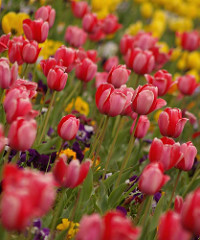

In [20]:
img

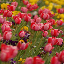

In [22]:
img=image.load_img(r'D:\Assigment3\Flowers-Dataset\flowers\tulip/478765271_6a8ca1cfa1_m.jpg',target_size=(64,64))
img

In [23]:
x=image.img_to_array(img)
x

array([[[151., 122.,  62.],
        [ 86.,  87.,  43.],
        [ 88.,  98.,  29.],
        ...,
        [201., 157.,   8.],
        [205., 162.,   6.],
        [206., 161.,   8.]],

       [[137., 103.,  91.],
        [109.,  98.,  70.],
        [114., 107.,  65.],
        ...,
        [207., 163.,   6.],
        [202., 156.,   8.],
        [181., 133.,   7.]],

       [[ 71.,  52.,  56.],
        [ 95.,  85.,  36.],
        [ 85.,  83.,  58.],
        ...,
        [221., 166.,  11.],
        [209., 162.,  10.],
        [189., 150.,  10.]],

       ...,

       [[ 65.,  67.,  17.],
        [ 79.,  68.,  23.],
        [ 85.,  50.,  31.],
        ...,
        [ 94.,  14.,  13.],
        [ 97.,  22.,  26.],
        [118.,  22.,  33.]],

       [[ 62.,  70.,  21.],
        [ 80.,  87.,  35.],
        [ 98.,  88.,  37.],
        ...,
        [ 88.,  27.,  22.],
        [ 82.,  24.,  23.],
        [ 87.,  13.,  28.]],

       [[ 63.,  71.,  22.],
        [ 85.,  92.,  40.],
        [101.,  

In [25]:
x=np.expand_dims(x,axis=0)
x

array([[[[151., 122.,  62.],
         [ 86.,  87.,  43.],
         [ 88.,  98.,  29.],
         ...,
         [201., 157.,   8.],
         [205., 162.,   6.],
         [206., 161.,   8.]],

        [[137., 103.,  91.],
         [109.,  98.,  70.],
         [114., 107.,  65.],
         ...,
         [207., 163.,   6.],
         [202., 156.,   8.],
         [181., 133.,   7.]],

        [[ 71.,  52.,  56.],
         [ 95.,  85.,  36.],
         [ 85.,  83.,  58.],
         ...,
         [221., 166.,  11.],
         [209., 162.,  10.],
         [189., 150.,  10.]],

        ...,

        [[ 65.,  67.,  17.],
         [ 79.,  68.,  23.],
         [ 85.,  50.,  31.],
         ...,
         [ 94.,  14.,  13.],
         [ 97.,  22.,  26.],
         [118.,  22.,  33.]],

        [[ 62.,  70.,  21.],
         [ 80.,  87.,  35.],
         [ 98.,  88.,  37.],
         ...,
         [ 88.,  27.,  22.],
         [ 82.,  24.,  23.],
         [ 87.,  13.,  28.]],

        [[ 63.,  71.,  22.],
       

In [26]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 193ms/step


array([4], dtype=int64)

In [27]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [28]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [29]:
index[y[0]]

'tulip'